# **STB600 Lab 5: Feature Extraction**

# 1. Introduction

Image feature extraction is the process of constructing derived values (**features**) that are intended to be **informative and non-redundant**. Image features include colors, gray levels, shapes, textures, and more broadly, any piece of information which is relevant for solving a certain application.

When dealing with **image classification**, features should be most relevant for discrimination and have **low intra-class variability** and **high between-class variability**. There are two principal aspects of image feature extraction:

1. **Feature detection**  
2. **Feature description**

Numerical feature descriptions are usually “packaged” in the form of a **feature vector** (i.e., a \(1 \times n\) or \(n \times 1\) matrix) and can then be further processed.

The **shape of an object** is an important and basic visual feature for describing image content. Therefore, the first task of this lab is to learn how to extract different object shape features, such as **area**, **perimeter**, **aspect ratio**, etc. This is mainly done by **extracting contours** from images and then calculating the contour properties.  

The second task introduces the **Scale-Invariant Feature Transform (SIFT)** algorithm for **local feature detection**.

> **Note:** You can go through the functions using pictures from Lab 4. If you want to explore more, for instance to classify images by extracted features, you will find two subfolders containing two different classes of images in this lab folder.

---

# 2. Learning Outcomes

After completing this lab, you should be able to:

- Find **contours** in a binary image and compute basic shape features (area, perimeter, bounding boxes, etc.).
- Interpret shape features (e.g., **aspect ratio**, **equivalent diameter**, **extreme points**) in terms of **object geometry**.
- **detect Task:** Detect SIFT keypoints in an image and visualize them.
- **Objective:** Understand what information SIFT keypoints and descriptors capture.

**Notes on SIFT:**
- SIFT (Scale-Invariant Feature Transform) detects **distinctive points** (keypoints) in an image that are invariant to **scale, rotation, and illumination changes**.
- Each keypoint has a **descriptor** that encodes the local gradient information around the keypoint, which is used for **matching and recognition**.

---

# 3. Task 1: Calculate Different Contour Features

To extract and analyze contour features such as **area**, **perimeter**, **centroid**, **bounding boxes**, etc., follow these steps:

1. **Read an image** and convert it to **grayscale**.
2. **Segment the object** from the background (e.g., thresholding, binary masking).
3. **Find contours** using `cv2.findContours()`.
4. **Select a contour of interest** (for example, the largest contour by area).
5. **Compute and visualize** its properties (area, perimeter, bounding box, centroid, aspect ratio, etc.).


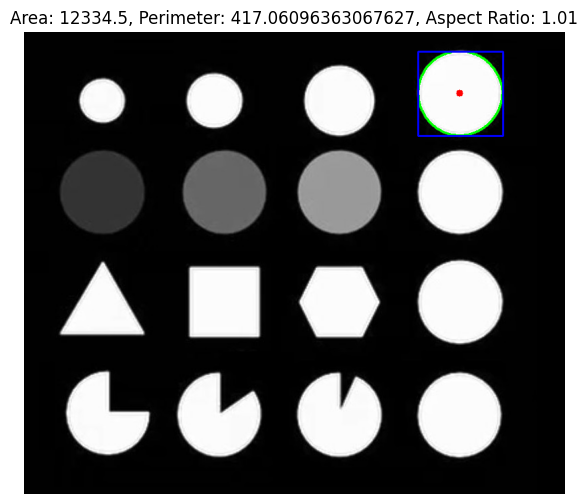

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1. Read image
img = cv2.imread("pics_Lab5/testImg.jpg") 
img_display = img.copy()  # copy for drawing extra features

# 2. Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Threshold to obtain a binary image (Otsu's method)
_, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 4. Find contours
contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. Choose one contour, for example the largest
cnt = max(contours, key=cv2.contourArea)

# 6. Compute contour features
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt, True)
x, y, w, h = cv2.boundingRect(cnt)
M = cv2.moments(cnt)
centroid_x = int(M['m10']/M['m00'])
centroid_y = int(M['m01']/M['m00'])
aspect_ratio = float(w)/h
equivalent_diameter = np.sqrt(4*area/np.pi)

# 7. Visualize contour and features
img_contour = img.copy()
cv2.drawContours(img_contour, [cnt], -1, (0, 255, 0), 2)
cv2.circle(img_contour, (centroid_x, centroid_y), 5, (0, 0, 255), -1)
cv2.rectangle(img_contour, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with matplotlib
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB))
plt.title(f"Area: {area}, Perimeter: {perimeter}, Aspect Ratio: {aspect_ratio:.2f}")
plt.axis('off')
plt.show()


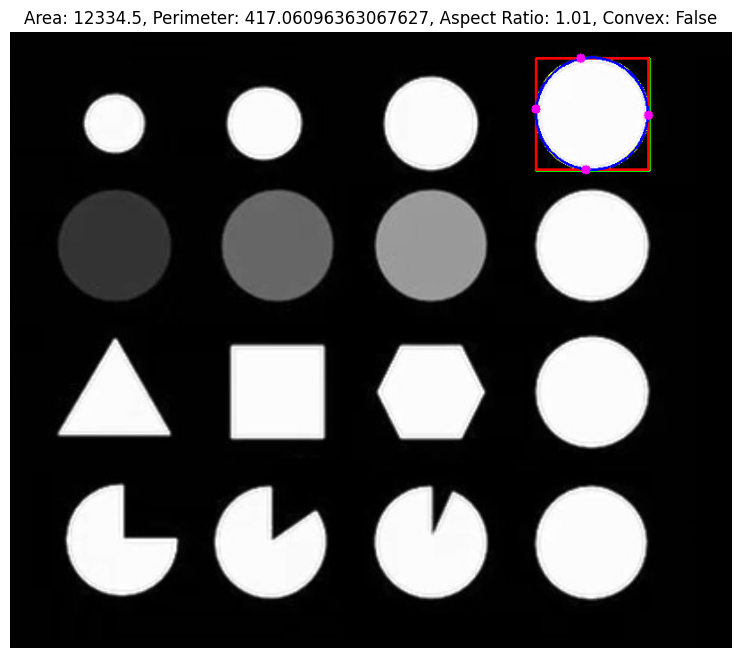

In [11]:
# ----------------------------
# Compute Features
# ----------------------------

# Moments
M = cv2.moments(cnt)

# Area
area = cv2.contourArea(cnt)

# Perimeter
perimeter = cv2.arcLength(cnt, True)

# Convex Hull
hull = cv2.convexHull(cnt)
cv2.drawContours(img_display, [hull], -1, (0, 255, 255), 2)  # Draw hull in yellow

# Checking Convexity
is_convex = cv2.isContourConvex(cnt)

# Straight Bounding Rectangle
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(img_display, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Rotated Rectangle
rect = cv2.minAreaRect(cnt)  # (center, (w,h), angle)
box = cv2.boxPoints(rect)
box = np.intp(box)
cv2.drawContours(img_display, [box], 0, (0, 0, 255), 2)

# Fitting an Ellipse (if contour has enough points)
if len(cnt) >= 5:
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img_display, ellipse, (255, 0, 0), 2)

    # Orientation from fitted ellipse
    (xe, ye), (MA, ma), angle = cv2.fitEllipse(cnt)
else:
    angle = None

# Aspect Ratio
aspect_ratio = float(w) / h

# Equivalent Diameter
equivalent_diameter = np.sqrt(4 * area / np.pi)

# Extreme Points
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

# Draw extreme points
cv2.circle(img_display, leftmost, 5, (255, 0, 255), -1)
cv2.circle(img_display, rightmost, 5, (255, 0, 255), -1)
cv2.circle(img_display, topmost, 5, (255, 0, 255), -1)
cv2.circle(img_display, bottommost, 5, (255, 0, 255), -1)

# ----------------------------
# Visualize all features
# ----------------------------
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
plt.title(f"Area: {area}, Perimeter: {perimeter}, Aspect Ratio: {aspect_ratio:.2f}, Convex: {is_convex}")
plt.axis('off')
plt.show()
